In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Load the datasets
dataset_1_path = 'EV_Dataset_1.csv'  # Replace with your file path if needed
dataset_2_path = 'EV_Dataset_2.csv'  # Replace with your file path if needed

In [3]:
df1 = pd.read_csv(dataset_1_path)
df2 = pd.read_csv(dataset_2_path)

In [4]:
# Display basic information about the datasets
print("Dataset 1 Info:")
print(df1.info())
print("\nDataset 2 Info:")
print(df2.info())

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
None

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null 

In [5]:
# Display first few rows of both datasets
print("\nDataset 1 Preview:")
print(df1.head())
print("\nDataset 2 Preview:")
print(df2.head())


Dataset 1 Preview:
     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  

Dataset 2 Preview:
   Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   


Vehicle Type Counts:
Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64


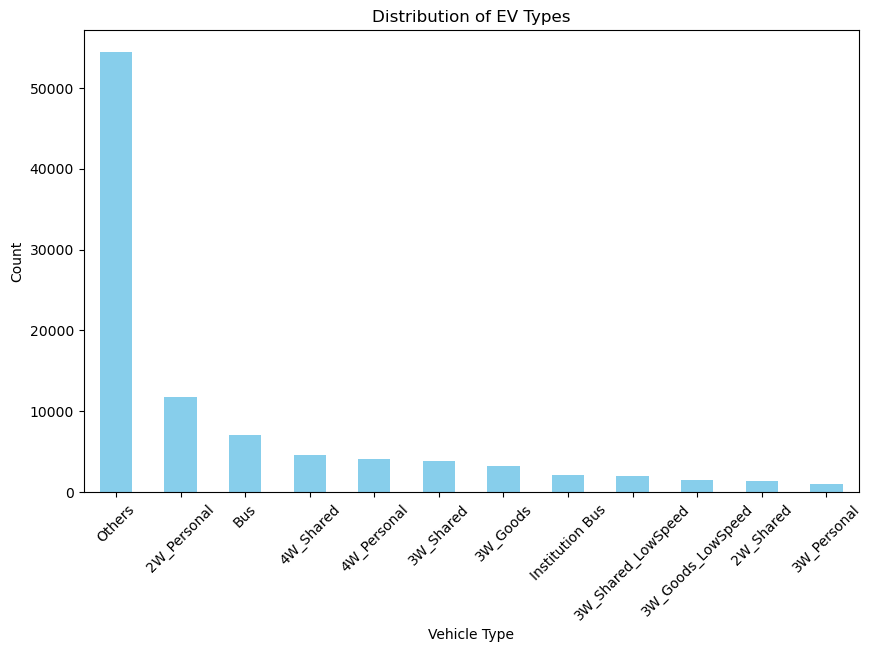

In [6]:
# Check for categories related to EV types
if 'Vehicle_Type' in df1.columns:
    ev_type_counts = df1['Vehicle_Type'].value_counts()
    print("\nVehicle Type Counts:")
    print(ev_type_counts)

    # Visualization for EV type distribution
    plt.figure(figsize=(10, 6))
    ev_type_counts.plot(kind='bar', color='skyblue')
    plt.title("Distribution of EV Types")
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

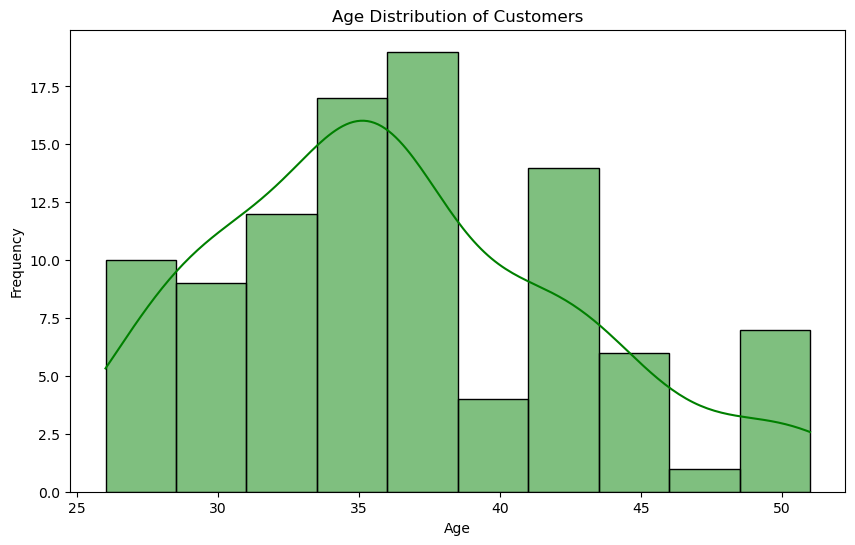

In [7]:
# Analyze age groups
if 'Age' in df2.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df2['Age'], kde=True, bins=10, color='green')
    plt.title("Age Distribution of Customers")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

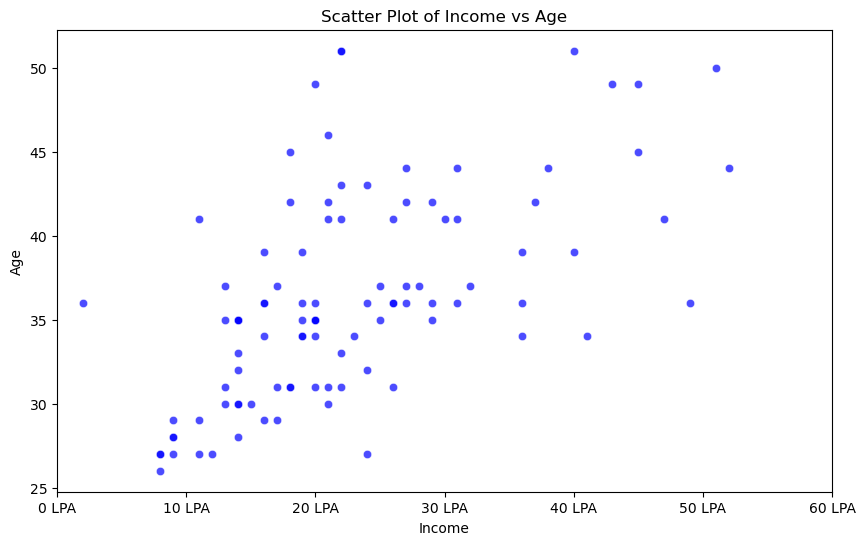

In [8]:
# Analyze income groups with a scatter plot
if 'Total Salary' in df2.columns and 'Age' in df2.columns:
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot for Income vs Age
    sns.scatterplot(
        x=df2['Total Salary'], 
        y=df2['Age'], 
        color='blue', 
        alpha=0.7
    )
    
    ## Set x-axis limits to start from 0
    plt.xlim(0, df2['Total Salary'].max() + 100000)  # Add some padding to max
    
    # Adjust x-axis ticks to show Income in LPA
    plt.xticks(
        ticks=plt.xticks()[0], 
        labels=[f"{int(x/100000)} LPA" for x in plt.xticks()[0] if x >= 0]
    )
    
        
    # Add titles and labels
    plt.title("Scatter Plot of Income vs Age")
    plt.xlabel("Income")
    plt.ylabel("Age")
    
    # Display the plot
    plt.show()

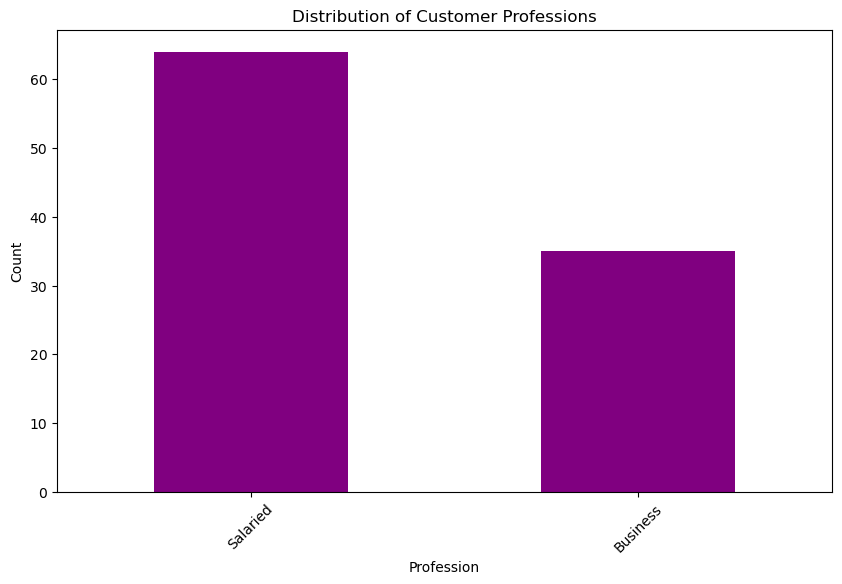

In [10]:
# Analyze professions
if 'Profession' in df2.columns:
    profession_counts = df2['Profession'].value_counts()
    plt.figure(figsize=(10, 6))
    profession_counts.plot(kind='bar', color='purple')
    plt.title("Distribution of Customer Professions")
    plt.xlabel("Profession")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

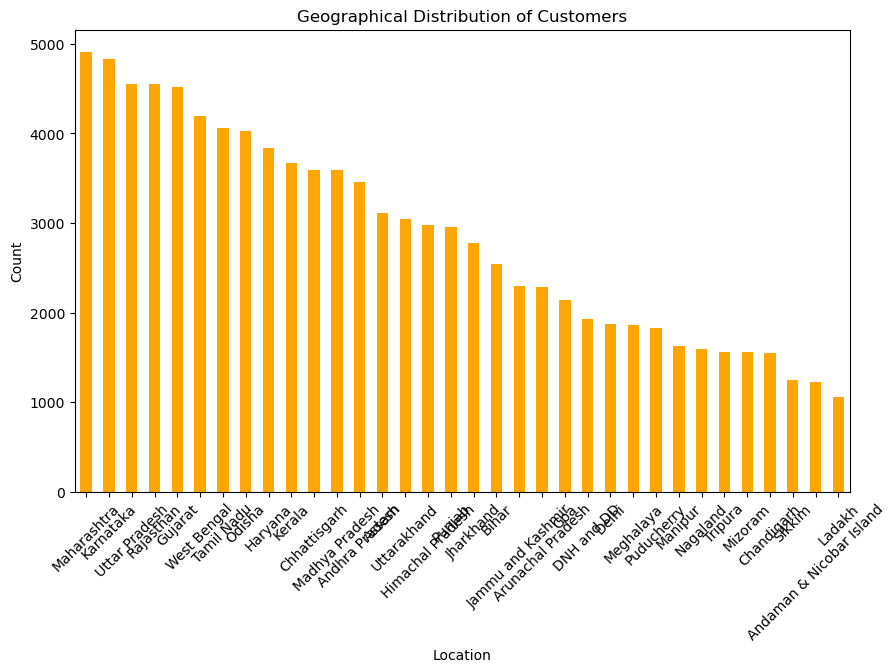

In [11]:
# Analyze geography
if 'State' in df1.columns:
    location_counts = df1['State'].value_counts()
    plt.figure(figsize=(10, 6))
    location_counts.plot(kind='bar', color='orange')
    plt.title("Geographical Distribution of Customers")
    plt.xlabel("Location")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

Distinct EV Types in Vehicle Category:
['Others' 'Bus' '2-Wheelers' '4-Wheelers' '3-Wheelers']


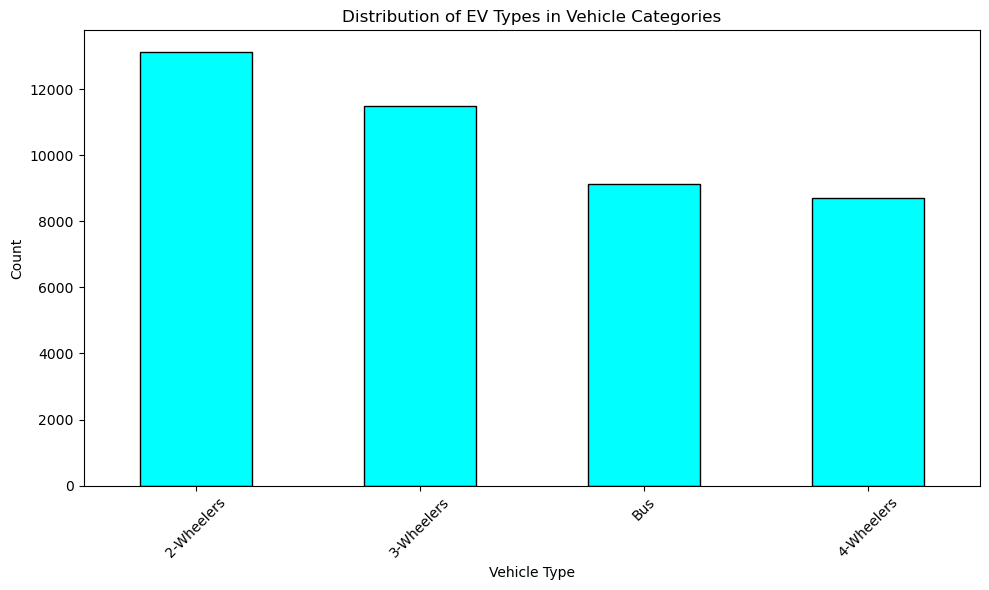

In [12]:
# Check for distinct EV types or categories in the 'Vehicle_Type' column of df1
if 'Vehicle_Category' in df1.columns:
    # Get unique EV types excluding 'Others'
    unique_ev_types = df1['Vehicle_Category'].unique()
    print("Distinct EV Types in Vehicle Category:")
    print(unique_ev_types)

    # Visualization of EV type distribution excluding 'Others'
    ev_type_counts = df1[df1['Vehicle_Category'] != 'Others']['Vehicle_Category'].value_counts()
    plt.figure(figsize=(10, 6))
    ev_type_counts.plot(kind='bar', color='cyan', edgecolor='black')
    plt.title("Distribution of EV Types in Vehicle Categories")
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Geographical Distribution for Each Vehicle Category:
Vehicle_Category  State                   
2-Wheelers        Rajasthan                   602
                  Karnataka                   600
                  Gujarat                     547
                  Uttar Pradesh               530
                  Haryana                     513
                                             ... 
Bus               Nagaland                    142
                  Ladakh                      129
                  Andaman & Nicobar Island    128
                  Tripura                     107
                  Mizoram                      97
Name: count, Length: 135, dtype: int64


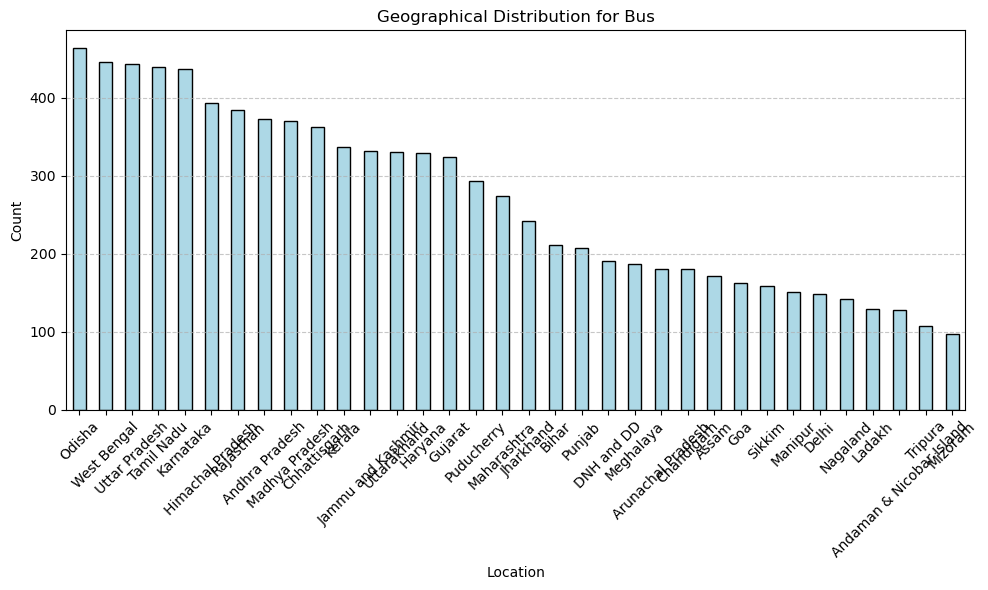

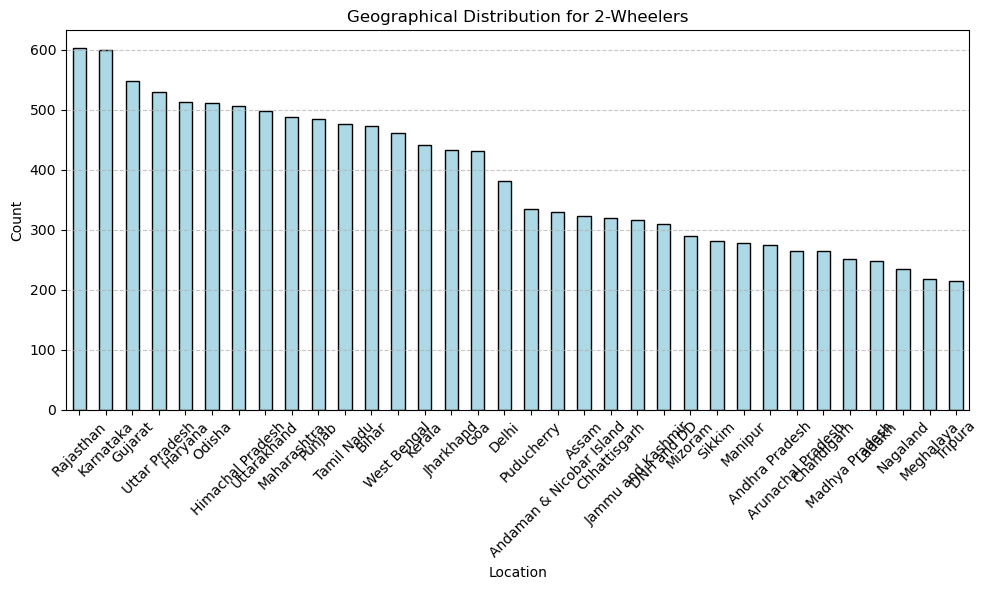

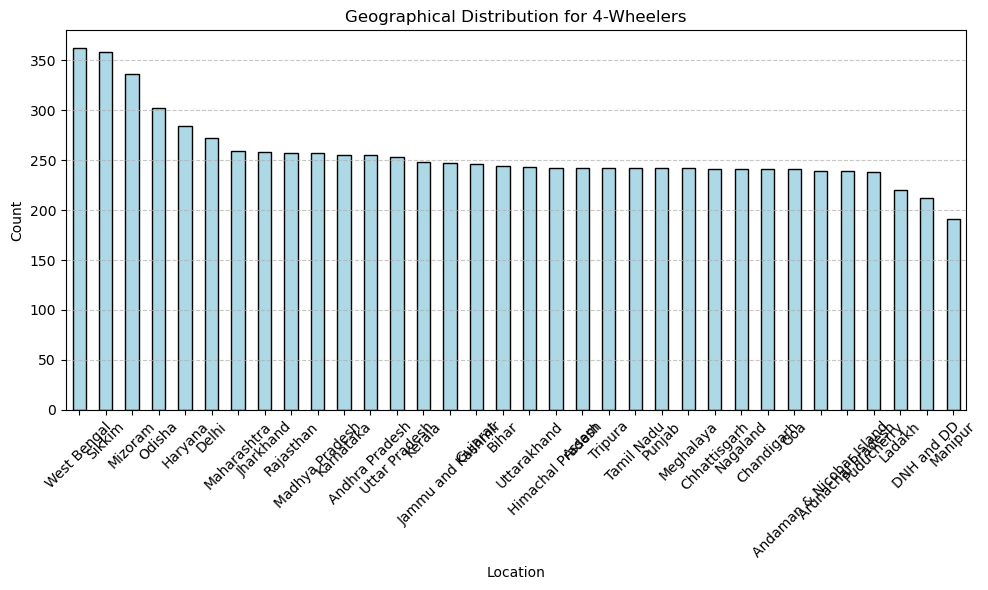

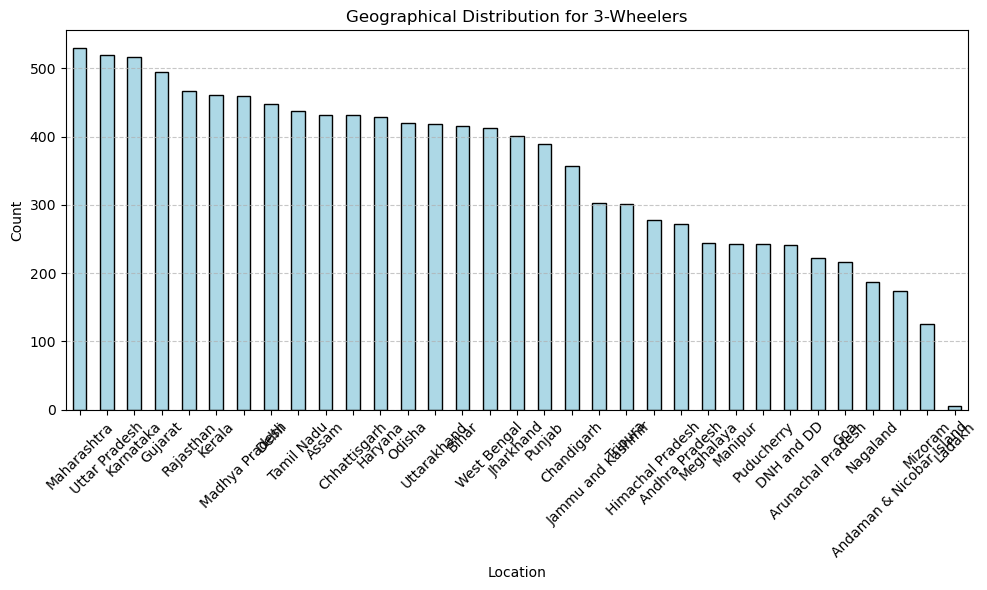

In [13]:
# Check if 'Vehicle_Type' and 'Location' columns exist in df1
if 'Vehicle_Category' in df1.columns and 'State' in df1.columns:
    # Filter out "Others" from 'Vehicle_Category'
    filtered_df = df1[df1['Vehicle_Category'] != 'Others']

    # Group the data by Vehicle_Category and State
    grouped_data = filtered_df.groupby('Vehicle_Category')['State'].value_counts()

    # Display the counts for each vehicle category and location
    print("Geographical Distribution for Each Vehicle Category:")
    print(grouped_data)

    # Plot the geographical distribution for each vehicle category
    unique_vehicle_types = filtered_df['Vehicle_Category'].unique()

    for vehicle_category in unique_vehicle_types:
        plt.figure(figsize=(10, 6))
        
        # Filter data for the current vehicle category
        vehicle_data = filtered_df[filtered_df['Vehicle_Category'] == vehicle_category]
        location_counts = vehicle_data['State'].value_counts()

        # Plot the distribution for the current vehicle category
        location_counts.plot(kind='bar', color='lightblue', edgecolor='black')
        plt.title(f"Geographical Distribution for {vehicle_category}")
        plt.xlabel("Location")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [14]:
# Copy data from df1 and df2 to avoid modifications to original datasets
df1_copy = df1.copy()
df2_copy = df2.copy()

In [17]:
# Encoding categorical features in df1
if 'Vehicle_Category' in df1_copy.columns:
    vehicle_mapping = {category: idx for idx, category in enumerate(df1_copy['Vehicle_Category'].unique())}
    df1_copy['Vehicle_Category'] = df1_copy['Vehicle_Category'].replace(vehicle_mapping).astype(int)

if 'State' in df1_copy.columns:
    state_mapping = {state: idx for idx, state in enumerate(df1_copy['State'].unique())}
    df1_copy['State'] = df1_copy['State'].replace(state_mapping).astype(int)

In [19]:
# Encoding categorical features in df2
if 'Profession' in df2_copy.columns:
    profession_mapping = {profession: idx for idx, profession in enumerate(df2_copy['Profession'].unique())}
    df2_copy['Profession'] = df2_copy['Profession'].replace(profession_mapping).astype(int)

In [20]:
# Selecting features for model building
features = [
    'Vehicle_Category', 'State',  # from df1
    'Age', 'Total Salary', 'Profession'  # from df2
]

In [21]:
# Merge selected features from df1 and df2
merged_df = pd.merge(
    df1_copy[['Vehicle_Category', 'State']],
    df2_copy[['Age', 'Total Salary', 'Profession']],
    left_index=True,
    right_index=True
)

In [22]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df)

In [23]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # Adjust components based on data complexity
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.267200,-0.433264,-1.166470,0.211377,-0.073967
1,-0.786428,-0.181467,-1.252022,-0.631937,-0.085118
2,-0.277239,1.739480,0.097268,-1.487854,-0.791478
3,-0.418242,1.547407,0.060664,-1.336438,-0.098910
4,-0.773735,-0.849221,-0.776144,-0.666008,0.680143


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

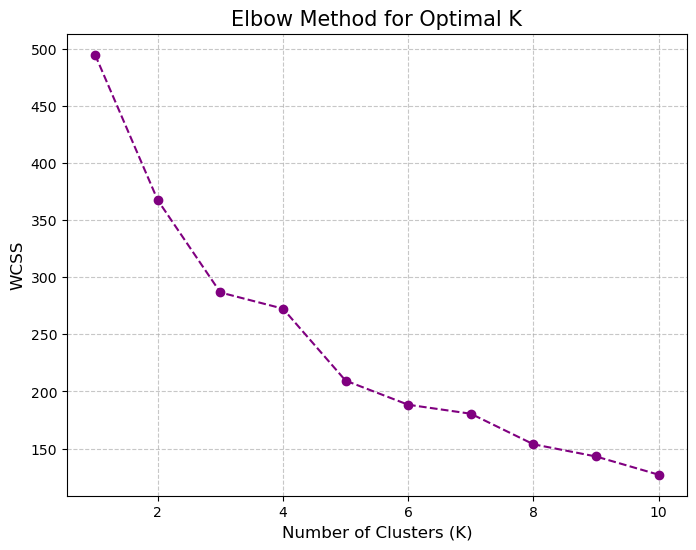

In [24]:
# Determine optimal clusters using Elbow Method
wcss = []

for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title('Elbow Method for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Training the K-Means model with the pre-determined number of clusters
optimal_k = 4  # Replace with your chosen number of clusters
kmean = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmean.fit(X_pca)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [26]:
# Check cluster labels and add to the dataset
merged_df['Cluster'] = kmean.labels_

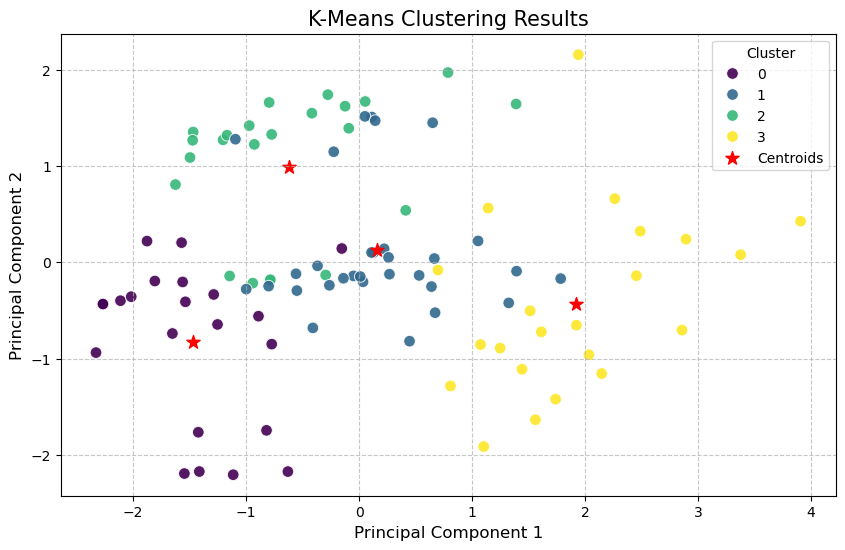

Cluster Sizes:
Cluster
1    31
2    24
0    22
3    22
Name: count, dtype: int64


In [27]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca['PC1'], 
    y=df_pca['PC2'], 
    hue=merged_df['Cluster'], 
    palette='viridis', 
    s=70, 
    alpha=0.9
)
plt.scatter(
    kmean.cluster_centers_[:, 0], 
    kmean.cluster_centers_[:, 1], 
    marker='*', 
    c='red', 
    s=100, 
    label='Centroids'
)
plt.title('K-Means Clustering Results', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Check the size of each cluster
print("Cluster Sizes:")
print(merged_df['Cluster'].value_counts())